In [1]:
from __future__ import print_function

plot_to_pdf = True

if plot_to_pdf:
    import matplotlib as mpl
    mpl.use('pdf')
    
    import matplotlib.pyplot as plt
    
    plt.rc('font', family='serif', serif='Times')
    plt.rc('text', usetex=True)
    plt.rc('xtick', labelsize=10)
    plt.rc('ytick', labelsize=10)
    plt.rc('axes', labelsize=10)
    plt.rc('legend', fontsize=10)
    title_font_size = 12
    data_font_size = 8
else:
    import matplotlib.pyplot as plt

from sympy import Symbol, diff, simplify, latex
import numpy as np
import time
# from tqdm import tqdm
from common import *
# from tqdm import tqdm
    
%matplotlib inline

common.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
l2_problem, l2_solver = load_problem(
    'configs/satellite.xml',
    problem_name='satellite', solver_name='BoxFDDP', problem_params={
# ==========================================
        'LossType': 'L2',
        'HuberRate': '0',
        'R_rate': '1e-4',
        'ControlCostWeight': '1',
# ==========================================
    })
l2_solver.max_iterations = 1000
l2_solver.debug_mode = True
l2_solution = l2_solver.solve()

Final Task Cost 2.37516493867


Text(0,0.5,'Control')

/home/tdinev/miniconda3/envs/py2gen/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


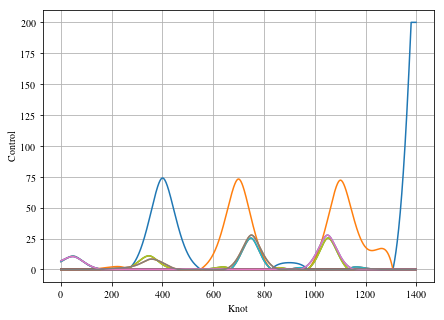

In [3]:
plt.figure(figsize=(7, 5))
print('Final Task Cost {0}'.format(l2_problem.get_state_cost(-1)))
plt.plot(l2_solution)
plt.grid()
plt.xlabel('Knot')
plt.ylabel('Control')

In [4]:
h_problem, h_solver = load_problem(
    'configs/satellite.xml',
    problem_name='satellite', solver_name='BoxFDDP', problem_params={
# ==========================================
        'LossType': 'Huber',
        'R_rate': '0',
        'ControlCostWeight': '1e-5',
        'HuberRate': '1'
# ==========================================
    })
h_solver.max_iterations = 300
h_solver.debug_mode = True
h_solution = h_solver.solve()

print('Huber cost {0}'.format(h_problem.get_state_cost(-1)))

Huber cost 0.532593474379


In [5]:
times = [0]
for i in range(h_problem.T - 1):
    times.append(times[-1] + h_problem.tau)
times = times[1:]

# Figure 7, Sparsity Too Low with Artifacts

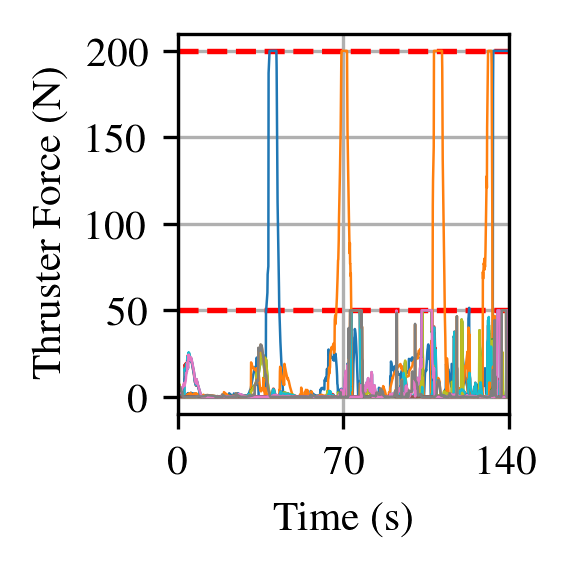

In [6]:
fig = plt.figure() #figsize=(13,6))
fig.set_size_inches(2, 2)
fig.set_dpi(300)

plt.plot(times, h_solution, linewidth=0.6)
# plt.legend(fontsize=20)
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Thruster Force (N)')
plt.xticks(np.linspace(0, 140, 3))
plt.yticks([0, 50, 100, 150, 200])
plt.xlim(0, 140)
plt.hlines(200, 0, 140, linestyle='dashed', linewidth=1.3, color='r')
plt.hlines(50, 0, 140, linestyle='dashed', linewidth=1.3, color='r')
# plt.legend(fontsize=8, frameon=True, labelspacing=0.1)
plt.tight_layout()

In [7]:
h_problem2, h_solver2 = load_problem(
    'configs/satellite.xml',
    problem_name='satellite', solver_name='BoxFDDP', problem_params={
# ==========================================
        'LossType': 'Huber',
        'R_rate': '0',
        'ControlCostWeight': '1e-3',
        'HuberRate': '1'
# ==========================================
    })
h_solver2.max_iterations = 300
h_solver2.debug_mode = True
h_solution2 = h_solver2.solve()

print('Final State Cost: {0}'.format(h_problem2.get_state_cost(-1)))

Final State Cost: 0.629968499934


# Figure 6. Correctly Tuned Sparsity

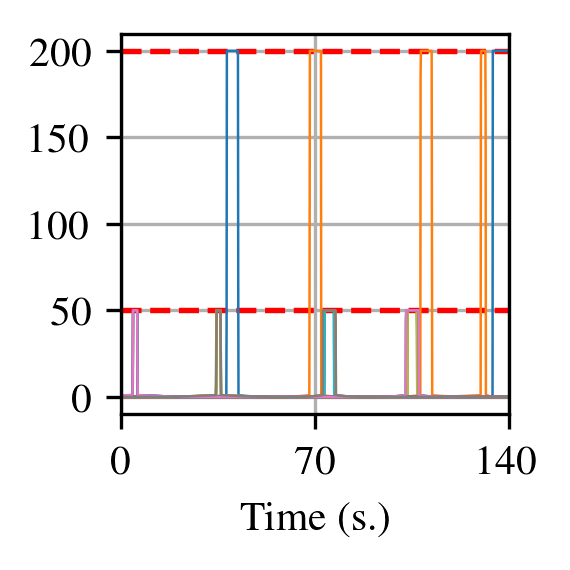

In [8]:
fig = plt.figure() #figsize=(13,6))
fig.set_size_inches(2, 2)
fig.set_dpi(300)

plt.plot(times, h_solution2, linewidth=0.6)
# plt.legend(fontsize=20)
plt.grid()
plt.xlabel('Time (s.)')
# plt.ylabel('Thruster Force (N.)')
plt.xticks(np.linspace(0, 140, 3))
plt.yticks([0, 50, 100, 150, 200])
plt.xlim(0, 140)
plt.hlines(200, 0, 140, linestyle='dashed', linewidth=1.3, color='r')
plt.hlines(50, 0, 140, linestyle='dashed', linewidth=1.3, color='r')
# plt.legend(fontsize=8, frameon=True, labelspacing=0.1)
plt.tight_layout()

In [9]:
h_problem3, h_solver3 = load_problem(
    'configs/satellite.xml',
    problem_name='satellite', solver_name='BoxFDDP', problem_params={
# ==========================================
        'LossType': 'Huber',
        'R_rate': '0',
        'ControlCostWeight': '1e-1',
        'HuberRate': '1'
# ==========================================
    })
h_solver3.max_iterations = 300
h_solver3.debug_mode = True
h_solution3 = h_solver3.solve()

print('Final cost {0}'.format(h_problem3.get_state_cost(-1)))

Final cost 15.7455521997


# Figure 7, Sparsity Too High

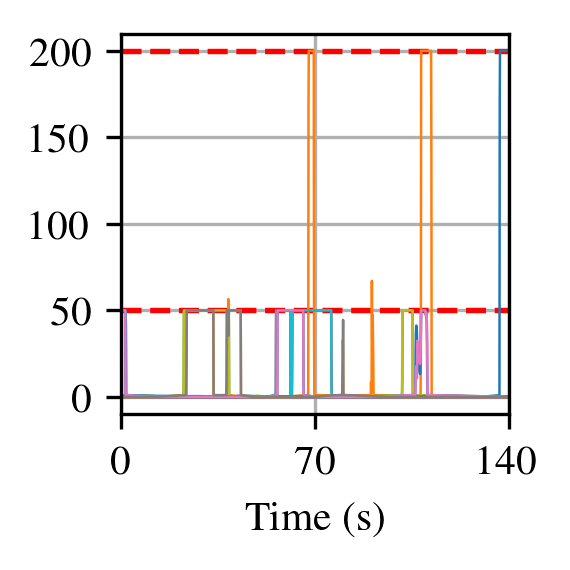

In [10]:
fig = plt.figure() #figsize=(13,6))
fig.set_size_inches(2, 2)
fig.set_dpi(300)

plt.plot(times, h_solution3, linewidth=0.6)
# plt.legend(fontsize=20)
plt.grid()
plt.xlabel('Time (s)')
# plt.ylabel('Thruster Force (N.)')
plt.xticks(np.linspace(0, 140, 3))
plt.yticks([0, 50, 100, 150, 200])
plt.xlim(0, 140)
plt.hlines(200, 0, 140, linestyle='dashed', linewidth=1.3, color='r')
plt.hlines(50, 0, 140, linestyle='dashed', linewidth=1.3, color='r')
# plt.legend(fontsize=8, frameon=True, labelspacing=0.1)
plt.tight_layout()

# Side-By-Side Plots

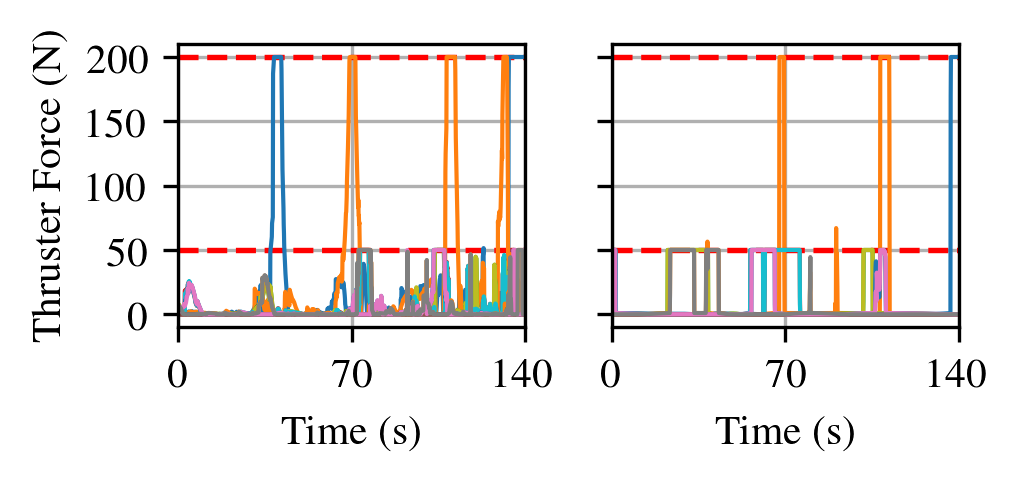

In [11]:
fig = plt.figure() #figsize=(13,6))
fig.set_size_inches(3.5, 1.7)
fig.set_dpi(300)


plt.subplot(1,2,1)
plt.plot(times, h_solution, linewidth=1)
# plt.legend(fontsize=20)
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Thruster Force (N)')
plt.xticks(np.linspace(0, 140, 3))
plt.yticks([0, 50, 100, 150, 200])
plt.xlim(0, 140)
plt.hlines(200, 0, 140, linestyle='dashed', linewidth=1.3, color='r')
plt.hlines(50, 0, 140, linestyle='dashed', linewidth=1.3, color='r')
# plt.legend(fontsize=8, frameon=True, labelspacing=0.1)
plt.tight_layout();


plt.subplot(1,2,2)
plt.plot(times, h_solution3, linewidth=1)
# plt.legend(fontsize=20)
plt.grid()
plt.xlabel('Time (s)')
# plt.ylabel('Thruster Force (N.)')
plt.xticks(np.linspace(0, 140, 3))
plt.yticks([0, 50, 100, 150, 200])
ax = plt.gca()
ax.set_yticklabels([])
plt.xlim(0, 140)
plt.hlines(200, 0, 140, linestyle='dashed', linewidth=1.3, color='r')
plt.hlines(50, 0, 140, linestyle='dashed', linewidth=1.3, color='r')
# plt.legend(fontsize=8, frameon=True, labelspacing=0.1)
plt.tight_layout()

# Side-By-Side for all three

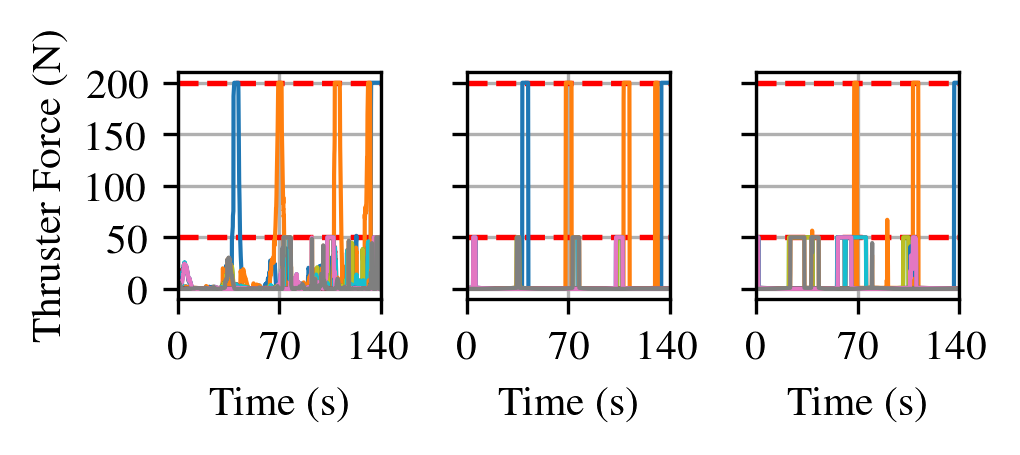

In [12]:
fig = plt.figure() #figsize=(13,6))
fig.set_size_inches(3.5, 1.6)
fig.set_dpi(300)


plt.subplot(1,3,1)
plt.plot(times, h_solution, linewidth=1)
# plt.legend(fontsize=20)
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Thruster Force (N)')
plt.xticks(np.linspace(0, 140, 3))
plt.yticks([0, 50, 100, 150, 200])
plt.xlim(0, 140)
plt.hlines(200, 0, 140, linestyle='dashed', linewidth=1.3, color='r')
plt.hlines(50, 0, 140, linestyle='dashed', linewidth=1.3, color='r')
# plt.legend(fontsize=8, frameon=True, labelspacing=0.1)
plt.tight_layout();



plt.subplot(1,3,2)

plt.plot(times, h_solution2, linewidth=1)
# plt.legend(fontsize=20)
plt.grid()
plt.xlabel('Time (s)')
# plt.ylabel('Thruster Force (N.)')
plt.xticks(np.linspace(0, 140, 3))
plt.yticks([0, 50, 100, 150, 200])
ax = plt.gca()
ax.set_yticklabels([])
plt.xlim(0, 140)
plt.hlines(200, 0, 140, linestyle='dashed', linewidth=1.3, color='r')
plt.hlines(50, 0, 140, linestyle='dashed', linewidth=1.3, color='r')
# plt.legend(fontsize=8, frameon=True, labelspacing=0.1)
plt.tight_layout()


plt.subplot(1,3,3)
plt.plot(times, h_solution3, linewidth=1)
# plt.legend(fontsize=20)
plt.grid()
plt.xlabel('Time (s)')
# plt.ylabel('Thruster Force (N.)')
plt.xticks(np.linspace(0, 140, 3))
plt.yticks([0, 50, 100, 150, 200])
ax = plt.gca()
ax.set_yticklabels([])
plt.xlim(0, 140)
plt.hlines(200, 0, 140, linestyle='dashed', linewidth=1.3, color='r')
plt.hlines(50, 0, 140, linestyle='dashed', linewidth=1.3, color='r')
# plt.legend(fontsize=8, frameon=True, labelspacing=0.1)
plt.tight_layout()
